In [1]:
import zipfile

In [ ]:
with zipfile.ZipFile("news.zip", "r") as zip_ref:
    zip_ref.extractall()

In [1]:
# Import Your Libraries
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Read Data into dataframe
df = pd.read_csv("news.csv")
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
#Get the Labels
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [4]:
# Train-test Split of the dataset
X_train, X_test, y_train, y_test = train_test_split(df["text"], labels, test_size=0.2, random_state=42)

In [5]:
"""Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 
(terms with a higher document frequency will be discarded). 
Stop words are the most common words in a language that are to be filtered out before processing the natural language data. 
And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features."""
#Initialize the TdifVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

#Fit and transform train set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

#Transfrom test set
tfidf_test = tfidf_vectorizer.transform(X_test)

In [6]:
#Initialize PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=150)

#Fit om tfidf_train, y_train
pac.fit(tfidf_train, y_train)

#Predict on the test set
y_pred = pac.predict(tfidf_test)

#Calculate accuracy score
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(acc_score*100, 2)}%")

Accuracy: 93.61%


In [9]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["FAKE", "REAL"])
cm

array([[589,  39],
       [ 42, 597]])

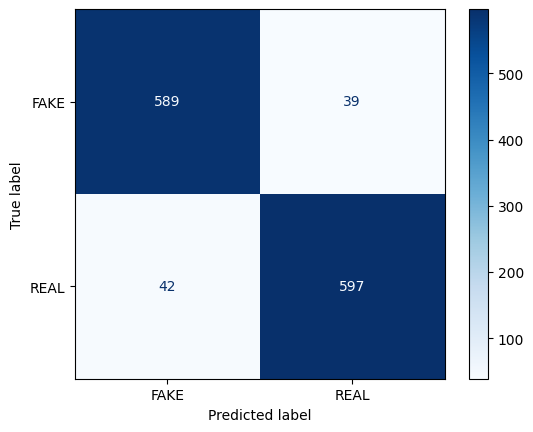

In [10]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["FAKE", "REAL"])
disp.plot(cmap=plt.cm.Blues)
plt.show()